# Analysis of US Senator Voting Clusters

## Import Packages

In [1]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

## Define Functions

In [2]:
def data_processing(year):
    congress_num = math.floor((year-1787)/2)
    session = (year+1)%2 +1
    
    senate_votes = pd.read_csv('../input/Senate_Votes_{}_{}.csv'.format(congress_num, session))
    senate_votes['Senator_Party_Color'] = senate_votes['Senator_Party'].apply(
        lambda x: np.where(x=="R", "red", np.where(x=="D", "blue", "green"))
    )
    
    vote_cols = [col for col in senate_votes if col.startswith('Vote_')]
    nb_votes = len(vote_cols)

    #Exclude short term senators 
    senate_votes = senate_votes[abs(senate_votes[vote_cols]).sum(axis=1) > (0.8*nb_votes)].reset_index(drop = True)

    votes = senate_votes[vote_cols]
    sen_info = senate_votes.drop(vote_cols, axis=1)
    
    return votes, sen_info

In [3]:
def pca_analysis(X, components = 2):
    X_std = StandardScaler().fit_transform(X)
    sklearn_pca = sklearnPCA(n_components = components)
    c_alpha = sklearn_pca.fit_transform(X_std)
    return c_alpha

In [4]:
def pca_plot(c_alpha, name, color):
    pca_1 = c_alpha[:,0]
    pca_2 = c_alpha[:,1]

    fig, ax = plt.subplots(1, 1, figsize = (13,13))
    ax.scatter(pca_1, pca_2, c = color)

    for i, txt in enumerate(name):
        ax.annotate(txt, (pca_1[i], pca_2[i]), fontsize = 13, color = 'black');
        
    ax.set_title('Distribution of US Senators according to Senate Votes ({})'.format(year), size = 'xx-large')
    plt.xlabel('PCA Axis 1', size = 'x-large')
    plt.ylabel('PCA Axis 2', size = 'x-large')

## 1993 Analysis (President Clinton's First Year) 

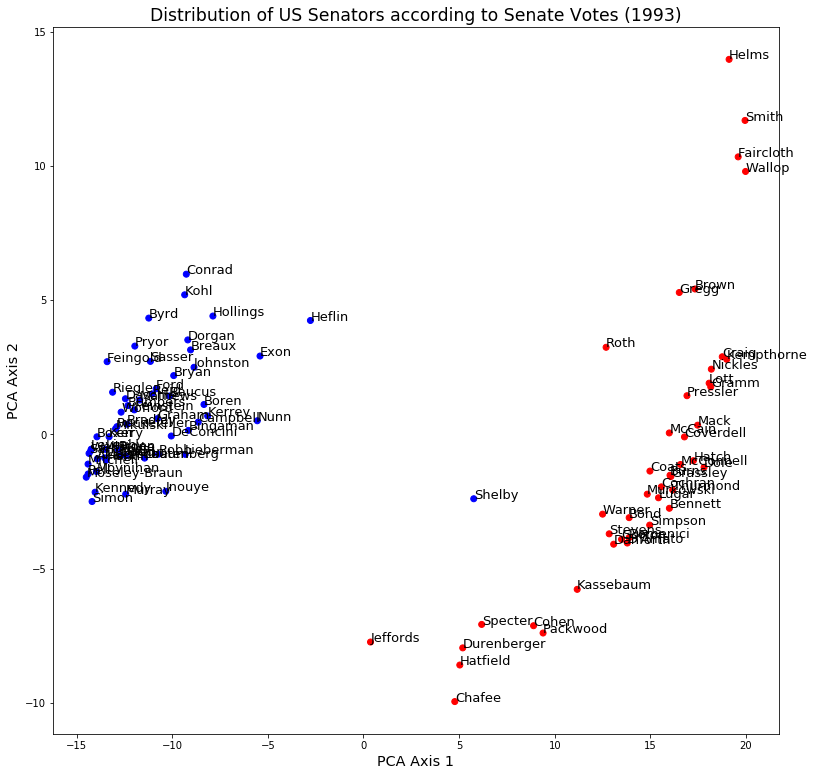

In [5]:
year = 1993
votes, sen_info = data_processing(year)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info['Senator_Name'], sen_info['Senator_Party_Color'])

## 2001 Analysis (President Bush's First Year)

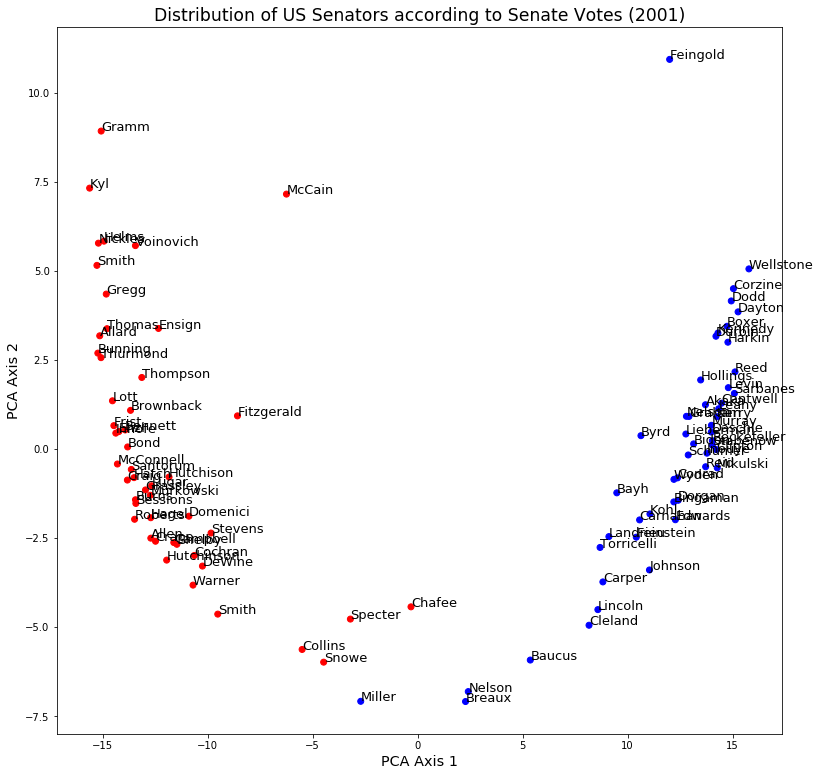

In [6]:
year = 2001
votes, sen_info = data_processing(year)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info['Senator_Name'], sen_info['Senator_Party_Color'])

## 2009 Analysis (President Obama's First Year)

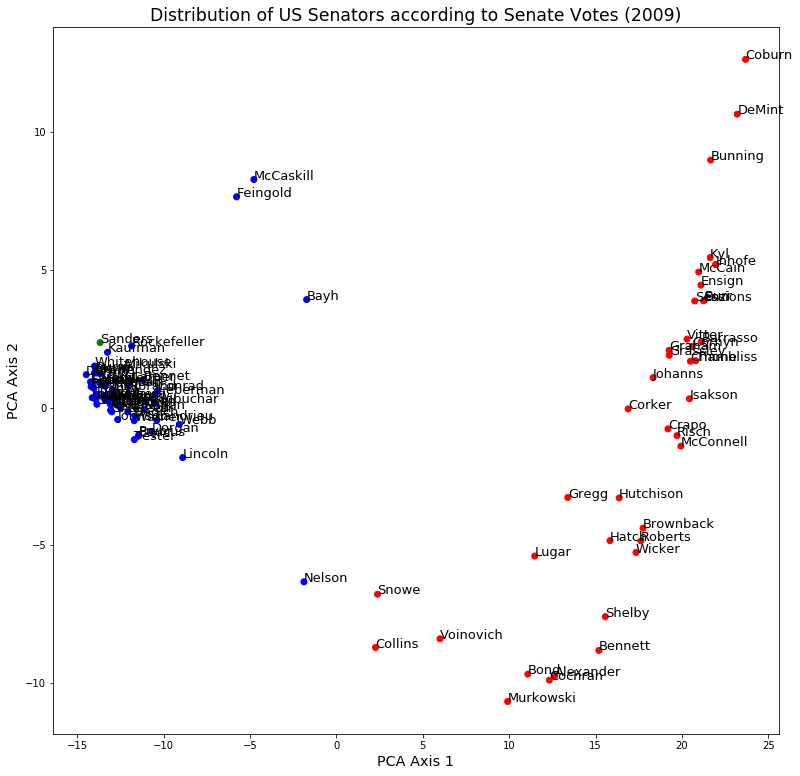

In [7]:
year = 2009
votes, sen_info = data_processing(year)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info['Senator_Name'], sen_info['Senator_Party_Color'])

## 2017 Analysis (President Trump's First Year)

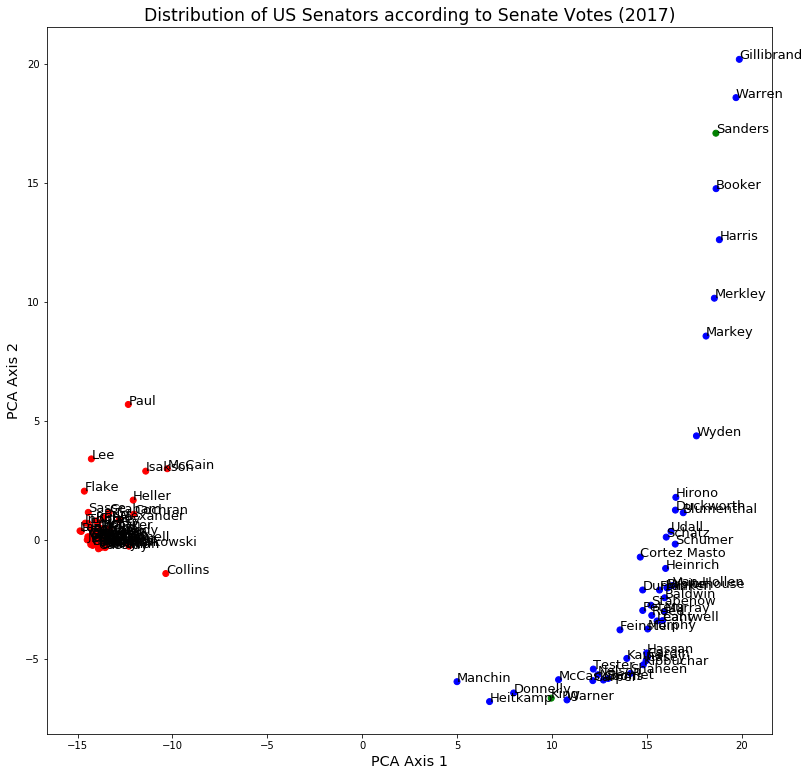

In [8]:
year = 2017
votes, sen_info = data_processing(year)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info['Senator_Name'], sen_info['Senator_Party_Color'])